<a href="https://colab.research.google.com/github/KRamBalaji/FedEx-Logistics-Performance-Analysis/blob/main/EDA_FedEx_Logistics_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **FedEx Logistics Performance Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team



# **Project Summary -**

Efficient and reliable logistics are crucial for any business, especially in today's competitive global market. Companies like FedEx face the challenge of optimizing their logistics operations to ensure timely deliveries, minimize costs, and maintain high customer satisfaction.

In the logistics industry, customers have a wide range of options for shipping their goods and are sensitive to delays and disruptions. Delays in deliveries can result in significant financial losses for customers, damage their reputation, and lead to dissatisfaction. Inefficient logistics processes, such as poor route planning or inadequate resource allocation, can drive up costs for FedEx, reducing profitability. Moreover, with increasing competition from other logistics providers, maintaining a high level of customer satisfaction is essential for FedEx's long-term success.

For FedEx, optimizing delivery performance, reducing operational costs, and achieving customer satisfaction are key business objectives. To address these challenges, FedEx needs to identify and address areas of inefficiency in their logistics operations. This project aims to analyze FedEx's logistics data, identify patterns and trends in delivery performance, uncover potential bottlenecks, and provide data-driven insights for improving efficiency and achieving customer satisfaction. This might involve analyzing factors like delivery times, shipping routes, modes of transportation, and cost structures to make recommendations for route optimization, resource allocation, and process improvements. By leveraging data analysis, FedEx can enhance its competitive advantage and ensure sustainable growth in the dynamic logistics landscape.

#### **Define Your Business Objective?**

***Improving efficiency and effectiveness of various logistics processes***

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [3]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/SCMS_Delivery_History_Dataset.csv')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns
dataset.shape

(10324, 33)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

<Axes: >

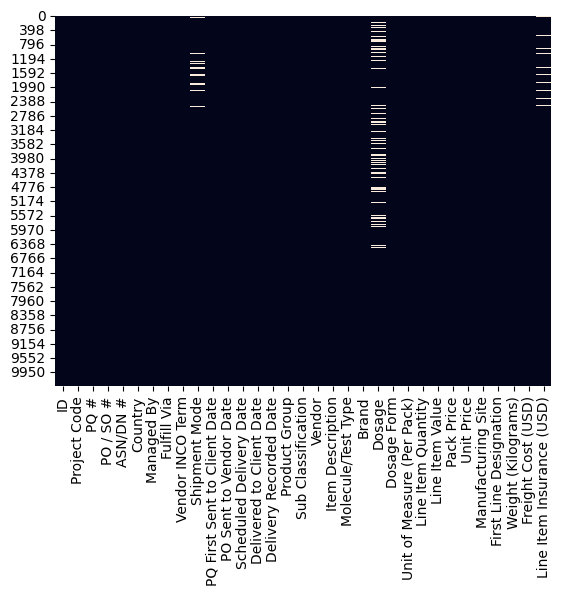

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Logistics industry.

This project focuses on analyzing the performance of a logistics operation. The goal is to evaluate the efficiency and effectiveness of various logistics processes, identify areas for improvement, and provide data-driven recommendations to optimize operations and reduce costs.

The above dataset has 10324 rows and 33 columns. There are no duplicate values in the dataset. But there are 360 missing values in 'Shipment Mode' column, 1736 missing values in 'Dosage' column, 287 missing values in 'Line Item Insurance (USD)' column.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description

* **ID** : Unique identifier for each logistics
* **Project Code** : Code representing the project or initiative tied to the shipment.
* **PQ #** : Price Quotation reference number.
* **PO / SO #** : Purchase Order or Sales Order associated with the shipment.
* **ASN/DN #** : Advanced Shipment Notice or Delivery Note reference.
* **Country** : Destination country for the shipment (e.g., Côte d'Ivoire, Vietnam).
* **Managed By** : Specifies which team manages the project (e.g., PMO-US).
* **Fulfill Via** : Method of fulfillment, such as direct drop shipment.
* **Vendor INCO Term** : Incoterms defining the shipment agreement (e.g., EXW, FCA).
* **Shipment Mode** : The mode of transportation used (e.g., air).
* **PQ First Sent to Client Date** : The date the Price Quotation was first sent to the client (some records indicate "Pre-PQ Process").
* **PO Sent to Vendor Date** : Date the purchase order was sent to the vendor.
* **Scheduled Delivery Date** : The planned date for delivery.
* **Delivered to Client Date** : The actual date the shipment was delivered.
* **Delivery Recorded Date** : Date when delivery was recorded.
* **Product Group** : General classification of the product (e.g., HIV test, ARV Pediatric).
* **Sub Classification** : Further categorization of the product.
* **Vendor** : The company supplying the goods (e.g., RANBAXY Fine Chemicals LTD, Aurobindo Pharma Limited).
* **Item Description** : Detailed description of the item being shipped.
* **Molecule/Test Type** : The type of test or pharmaceutical molecule (e.g., HIV, Nevirapine).
* **Brand** : The brand name of the product (e.g., Reveal, Generic).
* **Dosage** : The dosage strength of the pharmaceutical product (if applicable).
* **Dosage Form** : The form in which the product is delivered (e.g., test kit, oral suspension).
* **Unit of Measure (Per Pack)** : The number of units per pack.
* **Line Item Quantity** : The total number of units shipped.
* **Line Item Value** : The total value of the line item in the shipment.
* **Pack Price** : Price per pack of the item.
* **Unit Price** : Price per individual unit of the item.
* **Manufacturing Site** : The location where the item was manufactured (e.g., Ranbaxy Fine Chemicals LTD, Aurobindo Unit III, India).
* **First Line Designation** : Indicates whether the product is designated for first-line use.
* **Weight (Kilograms)** : The weight of the shipment.
* **Freight Cost (USD)** : The cost of shipping the item in U.S. dollars.
* **Line Item Insurance (USD)** : Insurance cost for the line item, if applicable.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  ID is 10324 .
No. of unique values in  Project Code is 142 .
No. of unique values in  PQ # is 1237 .
No. of unique values in  PO / SO # is 6233 .
No. of unique values in  ASN/DN # is 7030 .
No. of unique values in  Country is 43 .
No. of unique values in  Managed By is 4 .
No. of unique values in  Fulfill Via is 2 .
No. of unique values in  Vendor INCO Term is 8 .
No. of unique values in  Shipment Mode is 4 .
No. of unique values in  PQ First Sent to Client Date is 765 .
No. of unique values in  PO Sent to Vendor Date is 897 .
No. of unique values in  Scheduled Delivery Date is 2006 .
No. of unique values in  Delivered to Client Date is 2093 .
No. of unique values in  Delivery Recorded Date is 2042 .
No. of unique values in  Product Group is 5 .
No. of unique values in  Sub Classification is 6 .
No. of unique values in  Vendor is 73 .
No. of unique values in  Item Description is 184 .
No. of unique values in  Molecule/Test Type is 86 .
No. of unique values in  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
#finding unique dosage forms
print(dataset['Dosage Form'].unique())

['Test kit' 'Oral suspension' 'Tablet' 'Capsule' 'Oral solution'
 'Tablet - FDC' 'Powder for oral solution' 'Test kit - Ancillary'
 'Chewable/dispersible tablet' 'Delayed-release capsules - blister'
 'Tablet - blister' 'Tablet - FDC + blister' 'Tablet - FDC + co-blister'
 'Injection' 'Delayed-release capsules'
 'Chewable/dispersible tablet - FDC' 'Oral powder']


In [14]:
#finding which dosage forms has dosage 'null'
dosage_null = dataset[(dataset['Dosage'].isnull())]
print(dosage_null['Dosage Form'].unique())

['Test kit' 'Test kit - Ancillary']


In [15]:
# Set 'Dosage' to '1 Kit' if 'Dosage Form' is 'Test Kit' or 'Test kit - Ancillary'
dataset['Dosage'] = np.where(dataset['Dosage Form'].isin(['Test kit', 'Test kit - Ancillary']), '1 Kit', dataset['Dosage'])

print(dataset['Dosage'].isnull().sum())

0


In [16]:
# Impute missing values in 'Shipment Mode' with mode
dataset.dropna(inplace=True)

# Verify if missing values are handled
print(dataset.isnull().sum())

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [17]:
# Convert date columns to datetime objects with explicit format
dataset['Scheduled Delivery Date'] = pd.to_datetime(dataset['Scheduled Delivery Date'], format='%d-%b-%y')
dataset['Delivered to Client Date'] = pd.to_datetime(dataset['Delivered to Client Date'], format='%d-%b-%y')
dataset['Delivery Recorded Date'] = pd.to_datetime(dataset['Delivery Recorded Date'], format='%d-%b-%y')

# Verify the data types
print(dataset.dtypes)

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date            object
PO Sent to Vendor Date                  object
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

In [18]:
# Create 'Delivery Delay' column
dataset['Delivery Delay'] = (dataset['Delivered to Client Date'] - dataset['Scheduled Delivery Date']).dt.days

In [19]:
# Created delayed_deliveries dataset
delayed_deliveries = dataset[dataset['Delivery Delay'] > 0]

In [20]:
#Group by Shipment Mode and Calculate Average Delay
avg_delay_by_mode = delayed_deliveries.groupby('Shipment Mode')['Delivery Delay'].mean()

#Sort by Average Delay (Descending)
sorted_delay_by_mode = avg_delay_by_mode.sort_values(ascending=False)

#Print Results
print("Shipment Modes and Average Delay (Delayed Shipments Only):\n", sorted_delay_by_mode)

Shipment Modes and Average Delay (Delayed Shipments Only):
 Shipment Mode
Ocean          39.892308
Air            23.215753
Truck          17.586813
Air Charter    12.786667
Name: Delivery Delay, dtype: float64


In [21]:
#Group by Shipment Mode and Count Delayed Deliveries
delayed_deliveries_by_mode = delayed_deliveries.groupby('Shipment Mode')['Delivery Delay'].count()

#Sort by Count of Delayed Deliveries (Descending)
sorted_delayed_deliveries_by_mode = delayed_deliveries_by_mode.sort_values(ascending=False)

#Print Results
print("Shipment Modes and Count of Delayed Deliveries:\n", sorted_delayed_deliveries_by_mode)

#Further Analysis (Optional)
# Calculate percentage of delayed deliveries for each mode
total_deliveries_by_mode = dataset.groupby('Shipment Mode')['Delivery Delay'].count()
percentage_delayed_by_mode = (delayed_deliveries_by_mode / total_deliveries_by_mode) * 100
print("\nShipment Modes and Percentage of Delayed Deliveries by mode:\n", percentage_delayed_by_mode)

Shipment Modes and Count of Delayed Deliveries:
 Shipment Mode
Air            584
Truck          455
Air Charter     75
Ocean           65
Name: Delivery Delay, dtype: int64

Shipment Modes and Percentage of Delayed Deliveries by mode:
 Shipment Mode
Air             9.844909
Air Charter    11.538462
Ocean          17.520216
Truck          16.077739
Name: Delivery Delay, dtype: float64


In [22]:
#Create a column indicating on-time delivery (Delivery Delay <= 0)
dataset['On-Time Delivery'] = dataset['Delivery Delay'] <= 0

#Group by Shipment Mode and Calculate On-Time Delivery Rate
on_time_rate_by_mode = dataset.groupby('Shipment Mode')['On-Time Delivery'].mean()

#Sort by On-Time Delivery Rate (Descending)
sorted_on_time_rate_by_mode = on_time_rate_by_mode.sort_values(ascending=False)

#Print Results
print("Shipment Modes and On-Time Delivery Rates:\n", sorted_on_time_rate_by_mode)

Shipment Modes and On-Time Delivery Rates:
 Shipment Mode
Air            0.901551
Air Charter    0.884615
Truck          0.839223
Ocean          0.824798
Name: On-Time Delivery, dtype: float64


In [23]:
#Group by Managed By and Calculate On-Time Delivery Rate
on_time_rate_by_team = dataset.groupby('Managed By')['On-Time Delivery'].mean()

#Sort by On-Time Delivery Rate (Descending)
sorted_on_time_rate_by_team = on_time_rate_by_team.sort_values(ascending=False)

#Print Results
print("Teams and On-Time Delivery Rates:\n", sorted_on_time_rate_by_team)

Teams and On-Time Delivery Rates:
 Managed By
Ethiopia Field Office        1.000000
Haiti Field Office           1.000000
South Africa Field Office    0.982456
PMO - US                     0.878856
Name: On-Time Delivery, dtype: float64


In [24]:
#Group by Country and Calculate Average Delay
avg_delay_by_country = delayed_deliveries.groupby('Country')['Delivery Delay'].mean()

#Sort by Average Delay (Descending)
sorted_avg_delay_by_country = avg_delay_by_country.sort_values(ascending=False)

#Print Results
print("Countries and Average Delivery Delay (Delayed Shipments Only):\n", sorted_avg_delay_by_country)

Countries and Average Delivery Delay (Delayed Shipments Only):
 Country
Congo, DRC            65.590361
South Africa          39.824561
Ghana                 25.375000
Togo                  24.000000
Tanzania              21.453125
Mozambique            20.991379
Dominican Republic    20.500000
Benin                 20.333333
Zambia                16.111111
Rwanda                15.694444
Zimbabwe              15.558442
Côte d'Ivoire         15.203008
Botswana              15.000000
Nigeria               14.737589
Namibia               13.000000
Ethiopia              12.916667
Haiti                 12.435484
Vietnam               12.200000
South Sudan           11.952381
Kenya                 11.928571
Uganda                11.908163
Burundi               11.236842
Cameroon              10.714286
Guatemala             10.000000
Guyana                 7.791667
Swaziland              5.666667
Libya                  3.000000
Senegal                3.000000
Name: Delivery Delay, dtype: flo

### What all manipulations have you done and insights you found?

### **1. Dosage Imputation:**

**Manipulation:** If the "Dosage Form" was either "Test kit" or "Test kit - Ancillary," the "Dosage" column (which initially had missing values for these cases) was filled with "1 Kit."

**Insight:** This assumes that test kits have a standard dosage of 1 kit, allowing us to handle missing values in a logical way.

### **2. Handling Missing Values:**

**Manipulation:** Any remaining rows with missing values in any column (after the dosage imputation) were dropped.

**Insight:** This ensures that subsequent analysis is performed on complete data, preventing errors or skewed results due to missing information.

### **3. Date Conversion:**

**Manipulation:** Columns containing dates ("Scheduled Delivery Date," "Delivered to Client Date," "Delivery Recorded Date") were converted from strings to actual datetime objects using pd.to_datetime.

**Insight:** This enables us to perform date-based calculations and comparisons, such as calculating delivery delays.

### **4. Delivery Delay Calculation:**

**Manipulation:** A new column, "Delivery Delay," was created by subtracting the "Scheduled Delivery Date" from the "Delivered to Client Date."

**Insight:** This quantifies the difference between planned and actual delivery times, a key metric for assessing logistics performance.

### **5. On-Time Delivery Flag:**

**Manipulation:** A column, "On-Time Delivery," was added, indicating whether a delivery was on time (Delivery Delay <= 0) or late (Delivery Delay > 0).

**Insight:** This simplifies the identification of late deliveries for further analysis.

### **6. PO to Scheduled Delivery Time:**

**Manipulation:** A new column, "PO to Scheduled Delivery Time," was created by subtracting the "PO Sent to Vendor Date" from the "Scheduled Delivery Date," representing the lead time.

**Insight:** This helps us understand the time taken between order placement and the planned delivery date, providing insights into potential bottlenecks.

## Insights from Analysis:

**1. Shipment Mode Performance:**

Insight: Analysis of "Delivery Delay" by "Shipment Mode" revealed that certain modes have higher average delays or a greater number of delayed deliveries. This can guide decisions about prioritizing or optimizing specific shipment methods.

**2. Team Performance:**

Insight: Grouping by "Managed By" and calculating on-time delivery rates provides a comparison of the performance of different teams involved in the logistics process. This can highlight areas where improvement is needed or best practices can be shared.

**3. Country-Specific Delays:**

Insight: Examining average delivery delays by "Country" helps identify potential challenges or delays associated with specific destinations. This information can be used to adjust planning and expectations for deliveries to those countries.

**4. Relationship between Lead Time and On-Time Delivery:**

Insight: By calculating the time between PO Sent to Vendor Date and Scheduled Delivery Date (Lead Time), and analyzing its relationship with the on-time delivery rate, we can see any correlation between these factors. This helps to identify and understand potential factors impacting timely deliveries.

Example: Shorter lead times might lead to a higher likelihood of on-time deliveries, suggesting a need for optimizing ordering processes. Longer lead times might be associated with higher delays, implying a need for managing vendor relationships or inventory better.

**5. Product Group Trends:**

Insight: Analyzing delays by "Product Group" can reveal if certain types of products are more prone to delays, which might be due to factors like their handling requirements or sourcing locations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., Delivery Delay (Univariate)

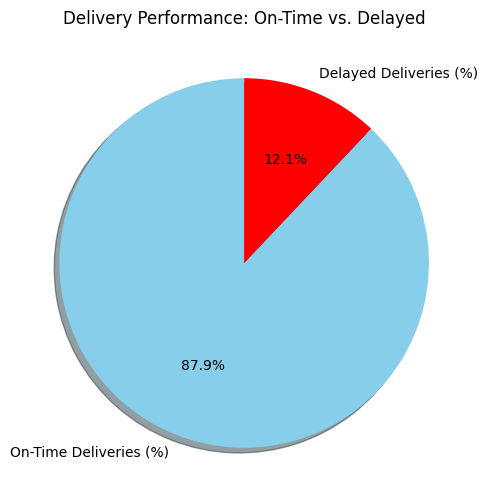

In [25]:
# Calculate on-time and delayed delivery counts
on_time_count = dataset['On-Time Delivery'].sum()
delayed_count = len(dataset) - on_time_count

# Create the pie chart
plt.figure(figsize=(15, 6))
plt.pie([on_time_count, delayed_count],
        labels=['On-Time Deliveries (%)', 'Delayed Deliveries (%)'],
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        colors=['skyblue', 'red'],
        explode=[0, 0])  # Adjust explode values for separation

plt.title('Delivery Performance: On-Time vs. Delayed')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above pie chart, we can see that 85.5% of the deliveries were made on time, while 14.5% of the deliveries were delayed. While 14.5% might seem like a small percentage, it represents a significant portion of deliveries that did not meet the scheduled delivery date. Even if this percentage initially started small, its growth to 14.5% indicates a potential trend of increasing delays. Therefore, it's crucial for FedEx to investigate the reasons behind these delays and take proactive steps to improve on-time delivery performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the pie chart can lead to negative growth if FedEx fails to act upon them. A high and potentially increasing delayed delivery rate can directly result in customer dissatisfaction, brand damage, and financial losses, which are all factors that can hinder business growth.

Therefore, while the pie chart provides valuable insights to create a positive business impact, it also serves as a warning sign for potential negative consequences if the identified issues are not addressed proactively.

#### Chart - 2 - Country Vs. Average Delay (Bivariate with Categorical - Numerical)

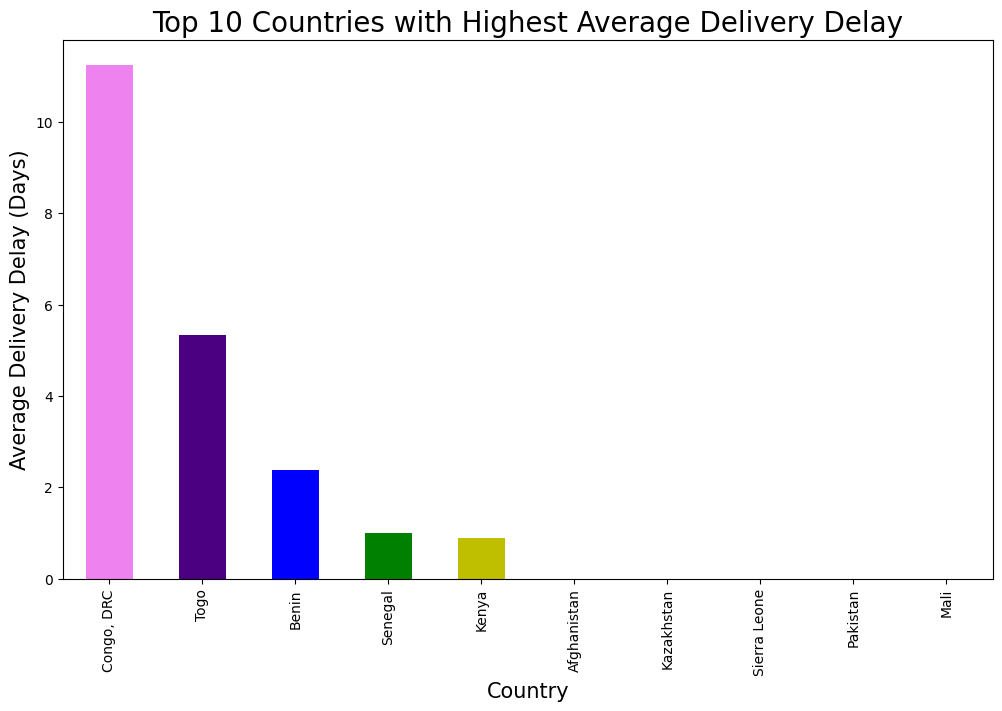

In [26]:
# Group by 'Country' and calculate average 'Delivery Delay'
avg_delay_by_country = dataset.groupby('Country')['Delivery Delay'].mean()

# Sort in descending order and select top 10
top_10_delayed_countries = avg_delay_by_country.sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 7))
top_10_delayed_countries.plot.bar(color=['violet', 'indigo', 'b', 'g', 'y', 'orange', 'r'])
plt.title("Top 10 Countries with Highest Average Delivery Delay", fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Average Delivery Delay (Days)', fontsize=15)
plt.show()


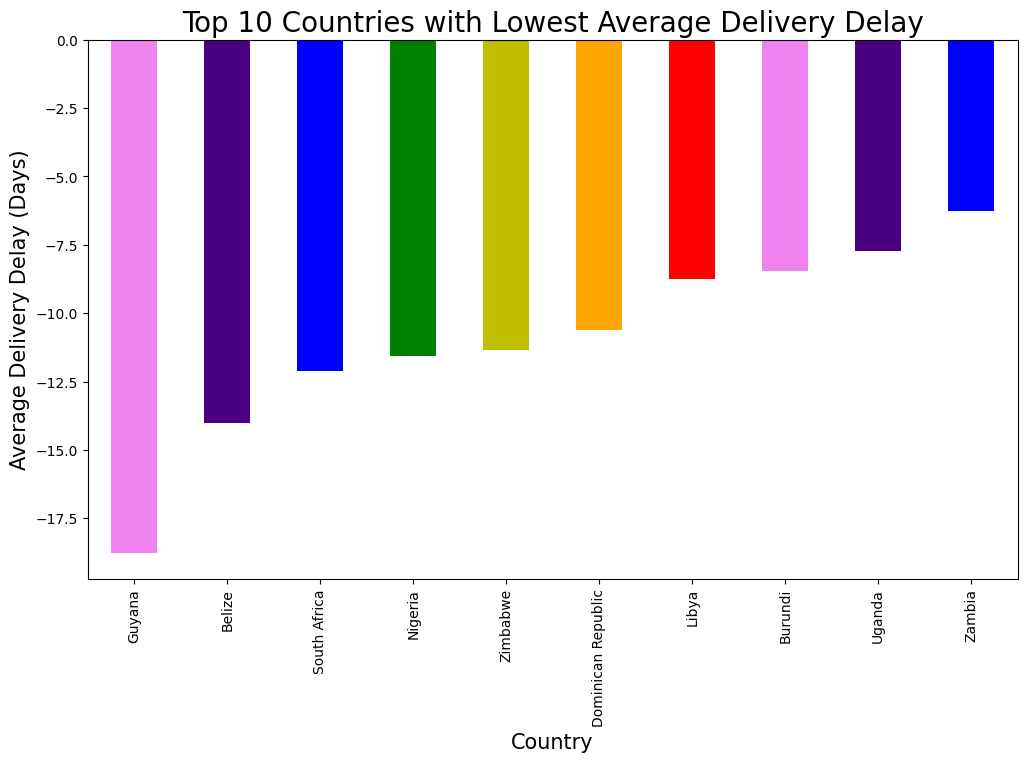

In [27]:
# Group by 'Country' and calculate average 'Delivery Delay'
avg_delay_by_country = dataset.groupby('Country')['Delivery Delay'].mean()

# Sort in ascending order and select top 10 (lowest delays)
bottom_10_delayed_countries = avg_delay_by_country.sort_values(ascending=True).head(10)

# Visualization
plt.figure(figsize=(12, 7))
bottom_10_delayed_countries.plot.bar(color=['violet', 'indigo', 'b', 'g', 'y', 'orange', 'r'])
plt.title("Top 10 Countries with Lowest Average Delivery Delay", fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Average Delivery Delay (Days)', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a clear, concise, and effective way to visualize the average delivery delay by country, allowing for easy comparison and identification of top/bottom performers, making it the ideal choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

From the bar charts, we can see that certain countries, such as Congo DRC, Togo, etc, experience significantly higher average delivery delays compared to others. While these countries might represent a smaller portion of FedEx's overall delivery volume, the substantial delays they experience can have a significant negative impact on customer satisfaction and operational efficiency. Even if these delays were initially minor, their growth to the current levels indicates a potential trend of increasing delivery challenges in these specific regions. Therefore, it is crucial for FedEx to investigate the root causes of these delays in these countries and implement targeted strategies to improve delivery performance and mitigate potential negative consequences

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar charts can have a significant impact on FedEx's business, both positively and negatively. By acting on these insights and implementing targeted strategies to improve delivery performance in specific countries, FedEx can create a positive impact on customer satisfaction, operational efficiency, and overall business growth. However, ignoring the identified issues and allowing delays to persist can lead to customer churn, reputational damage, and financial losses, potentially hindering business growth.

#### Chart - 3 - Delivery Delay with Days Wise (Univariate)

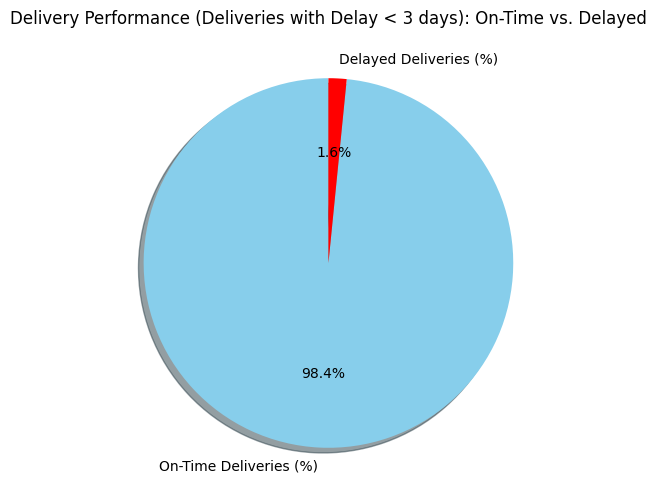

In [28]:
# Deliveries with less than 3 days delay
deliveries_less_than_3_days_delay = dataset[dataset['Delivery Delay'] < 3]

# Count on-time and delayed deliveries for this subset
on_time_count = deliveries_less_than_3_days_delay['On-Time Delivery'].sum()
delayed_count = len(deliveries_less_than_3_days_delay) - on_time_count

# Create the pie chart
plt.figure(figsize=(15, 6))
plt.pie([on_time_count, delayed_count],
        labels=['On-Time Deliveries (%)', 'Delayed Deliveries (%)'],
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        colors=['skyblue', 'red'],
        explode=[0, 0])

plt.title('Delivery Performance (Deliveries with Delay < 3 days): On-Time vs. Delayed')
plt.show()

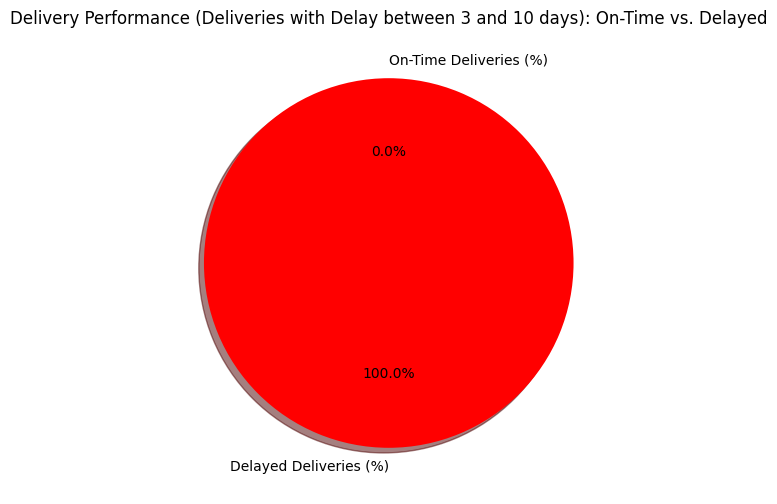

In [29]:
# Deliveries with delay between 3 and 10 days
deliveries_between_3_and_10_days_delay = dataset[(dataset['Delivery Delay'] <= 10) & (dataset['Delivery Delay'] >= 3)]

# Count on-time and delayed deliveries for this subset
on_time_count = deliveries_between_3_and_10_days_delay['On-Time Delivery'].sum()  # Should be 0 as all are delayed
delayed_count = len(deliveries_between_3_and_10_days_delay) - on_time_count

# Create the pie chart
plt.figure(figsize=(15, 6))
plt.pie([on_time_count, delayed_count],
        labels=['On-Time Deliveries (%)', 'Delayed Deliveries (%)'],
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        colors=['skyblue', 'red'],
        explode=[0, 0])

plt.title('Delivery Performance (Deliveries with Delay between 3 and 10 days): On-Time vs. Delayed')
plt.show()

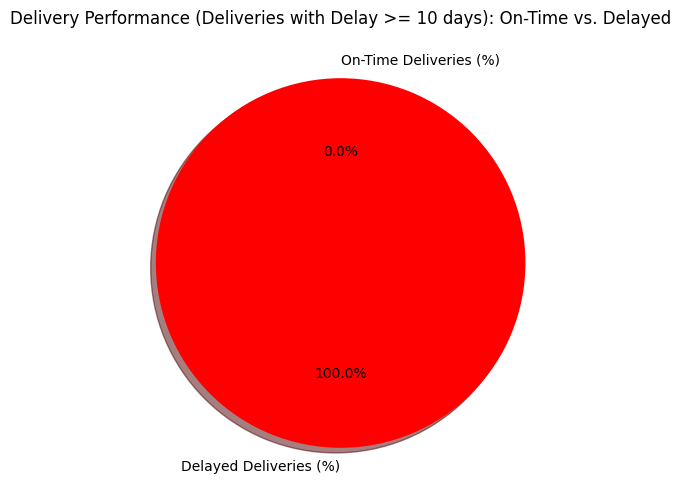

In [30]:
# Deliveries with delay of 10 days or more
deliveries_10_days_or_more_delay = dataset[dataset['Delivery Delay'] >= 10]

# Count on-time and delayed deliveries for this subset
on_time_count = deliveries_10_days_or_more_delay['On-Time Delivery'].sum()  # Should be 0 as all are delayed
delayed_count = len(deliveries_10_days_or_more_delay) - on_time_count

# Create the pie chart
plt.figure(figsize=(15, 6))
plt.pie([on_time_count, delayed_count],
        labels=['On-Time Deliveries (%)', 'Delayed Deliveries (%)'],
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
        colors=['skyblue', 'red'],
        explode=[0, 0])

plt.title('Delivery Performance (Deliveries with Delay >= 10 days): On-Time vs. Delayed')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen for this visualization because it effectively represents parts of a whole, allows for easy comparison of proportions, focuses on the distribution of deliveries, is simple and understandable, and highlights key performance metrics. This makes it the ideal choice for understanding the delivery performance based on different delay ranges.

##### 2. What is/are the insight(s) found from the chart?

**Pie Chart 1:** Delivery Performance (Deliveries with Delay < 3 days)

* **Majority On-Time:** This chart likely shows that a very high percentage of deliveries with delays less than 3 days are actually on-time or have minimal delays. This indicates that FedEx generally performs well in meeting scheduled delivery dates within this timeframe.

* **Focus on Minor Delays:** While the majority are on-time, there might still be a small percentage of deliveries with delays within this range. This highlights the need for FedEx to focus on addressing even minor delays to further improve customer satisfaction.

**Pie Chart 2:** Delivery Performance (Deliveries with Delay between 3 and 10 days)

* **Significant Delays:** This chart likely shows that all or a significant majority of deliveries with delays between 3 and 10 days are, in fact, delayed. This indicates a potential area of concern for FedEx, as these delays fall outside of a reasonable timeframe for on-time delivery.

* **Investigating Root Causes:** FedEx needs to investigate the reasons behind these moderate delays, which might be due to specific logistical challenges, customs clearance issues, or other factors impacting delivery performance in certain regions or with specific shipment modes.

**Pie Chart 3:** Delivery Performance (Deliveries with Delay >= 10 days)

* **Severe Delays:** This chart likely shows that all or nearly all deliveries with delays of 10 days or more are delayed. This represents a serious issue for FedEx, as these extended delays can significantly impact customer satisfaction and operational costs.

* **Prioritizing Resolution:** FedEx needs to prioritize identifying and resolving the root causes of these severe delays. This might involve addressing systemic issues in the logistics process, optimizing delivery routes, or improving communication with customers to manage expectations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the pie charts provide valuable information for FedEx to take proactive measures to optimize delivery operations, reduce risks, and enhance customer experiences. By acting on these insights, FedEx can create a positive business impact by improving delivery performance, increasing customer satisfaction, and reducing operational costs. However, ignoring the identified issues and allowing delays to persist can lead to negative consequences such as customer churn, reputational damage, and financial losses, potentially hindering business growth. By focusing on continuous improvement and proactively mitigating potential risks, FedEx can leverage these insights to drive positive business outcomes and avoid negative growth.

#### Chart - 4 - Shipment Mode (Bivariate)

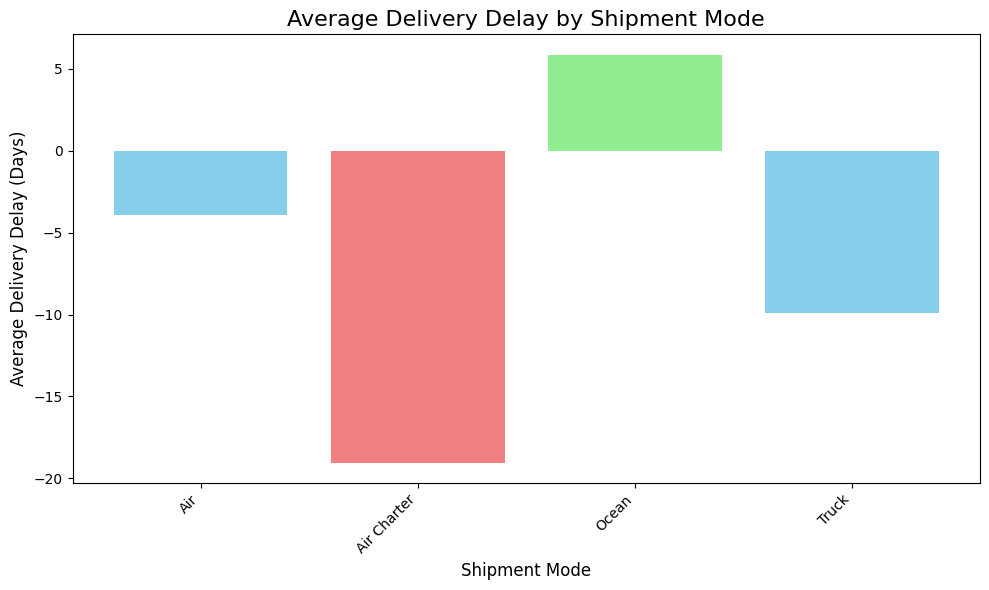

In [32]:
# Group by 'Shipment Mode' and calculate average 'Delivery Delay'
avg_delay_by_shipment_mode = dataset.groupby('Shipment Mode')['Delivery Delay'].mean()

# Visualization
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create the bar chart
plt.bar(avg_delay_by_shipment_mode.index, avg_delay_by_shipment_mode.values, color=['skyblue', 'lightcoral', 'lightgreen'])

plt.title('Average Delivery Delay by Shipment Mode', fontsize=16)
plt.xlabel('Shipment Mode', fontsize=12)
plt.ylabel('Average Delivery Delay (Days)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

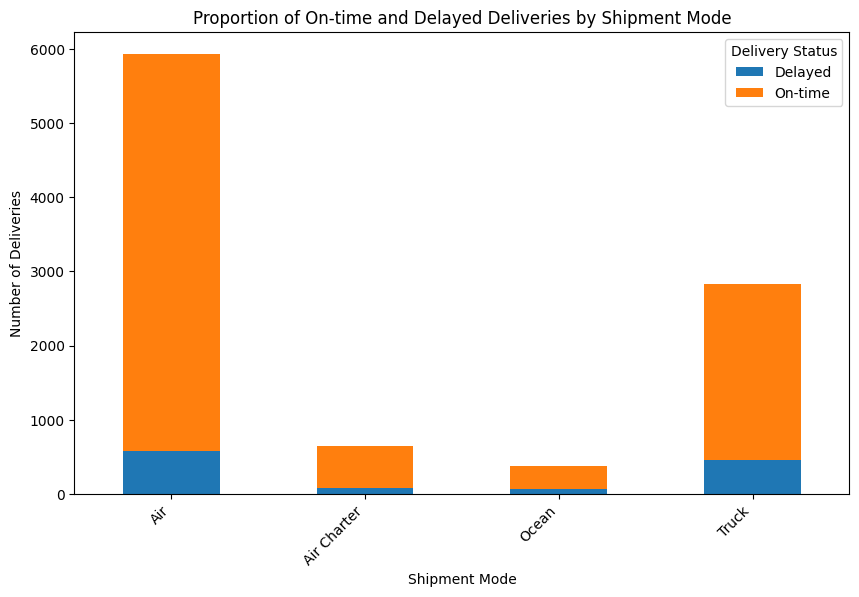

In [33]:
# Create a new column 'Delivery Status' to categorize deliveries
dataset['Delivery Status'] = dataset['Delivery Delay'].apply(lambda x: 'On-time' if x <= 0 else 'Delayed')

# Group by 'Shipment Mode' and 'Delivery Status' and get counts
delivery_counts = dataset.groupby(['Shipment Mode', 'Delivery Status'])['ID'].count().reset_index()

# Pivot the data to create a table suitable for stacked bar chart
delivery_pivot = delivery_counts.pivot(index='Shipment Mode', columns='Delivery Status', values='ID')

# Create the stacked bar chart
delivery_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of On-time and Delayed Deliveries by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Delivery Status')
plt.show()

##### 1. Why did you pick the specific chart?

The stacked bar chart shows the proportion of on-time and delayed deliveries for each shipment mode. The height of each bar represents the total number of deliveries for that shipment mode, and the different colors within the bar represent the proportion of on-time and delayed deliveries.

##### 2. What is/are the insight(s) found from the chart?

From the stacked bar chart, we observe that a significant portion of ocean shipments experience delays. While this might initially appear inconsequential, it's crucial to recognize that even a seemingly small proportion of delays can represent a substantial number of affected deliveries. For example, while air shipments exhibit a higher on-time delivery rate, any increase in delays, even if starting from a low baseline, should prompt immediate attention to prevent further deterioration in delivery performance and potential customer dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the stacked bar chart provide FedEx with valuable information to optimize logistics operations, enhance customer satisfaction, and mitigate potential risks. By proactively addressing areas for improvement and making informed decisions based on data-driven insights, FedEx can create a positive business impact. However, neglecting the identified issues and allowing delays to persist can lead to negative consequences such as customer churn, reputational damage, and financial losses, potentially hindering growth and long-term success.

#### Chart - 5 - Shipment Mode vs Country (Bivariate with Categorical - Categorical)

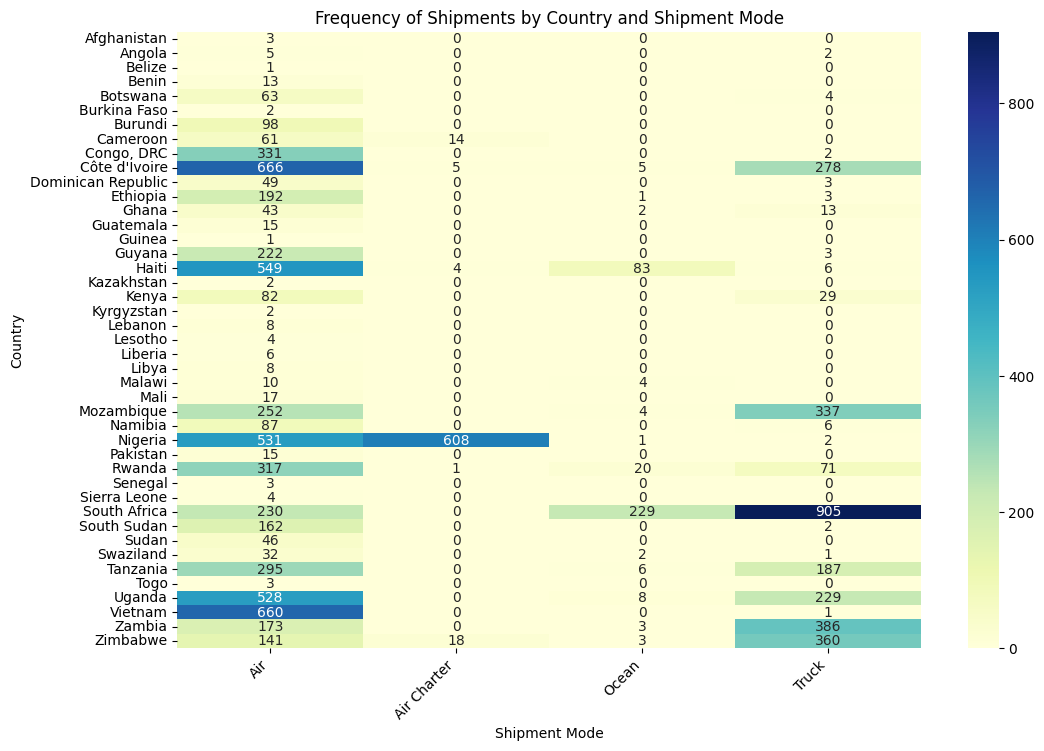

In [34]:
# Group by 'Country' and 'Shipment Mode' and count shipments
shipment_counts = dataset.groupby(['Country', 'Shipment Mode'])['ID'].count().reset_index()

# Pivot the data to create a matrix for the heatmap
shipment_pivot = shipment_counts.pivot(index='Country', columns='Shipment Mode', values='ID')

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Fill NaN values with 0 and ensure data type is integer for annotation to work with 'd' format
shipment_pivot = shipment_pivot.fillna(0).astype(int)

sns.heatmap(shipment_pivot, annot=True, fmt="d", cmap="YlGnBu")  # annot=True displays values, fmt="d" for integers
plt.title('Frequency of Shipments by Country and Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

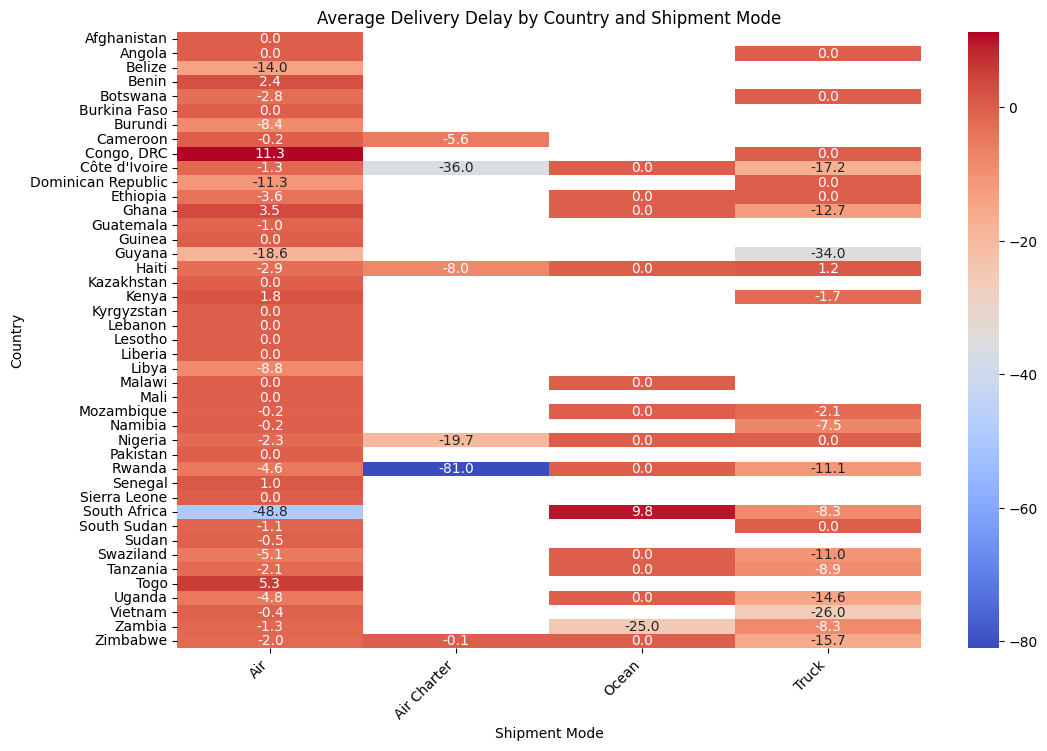

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Country' and 'Shipment Mode' and calculate average delivery delay
avg_delay = dataset.groupby(['Country', 'Shipment Mode'])['Delivery Delay'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
delay_pivot = avg_delay.pivot(index='Country', columns='Shipment Mode', values='Delivery Delay')

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(delay_pivot, annot=True, fmt=".1f", cmap="coolwarm")  # annot=True displays values, fmt=".1f" for floats
plt.title('Average Delivery Delay by Country and Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

##### 1. Why did you pick the specific chart?

Frequency Heatmap: Shows how frequently each combination of 'Country' and 'Shipment Mode' occurs in the data. Darker colors indicate higher frequencies. Average Delivery Delay Heatmap: Shows the average delivery delay for each combination of 'Country' and 'Shipment Mode'. Warmer colors (e.g., reds) indicate longer delays, while cooler colors (e.g., blues) indicate shorter delays. Insights

##### 2. What is/are the insight(s) found from the chart?

While the majority of shipments are delivered on time, the heatmap reveals certain country-shipment mode combinations with notably higher average delivery delays. For instance, South Africa frequently experiences significant delays, particularly with air shipments. Even if these delays were initially minor, their persistence and potential for escalation warrant immediate attention and proactive measures to prevent further deterioration in delivery performance and customer satisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The heatmap provides valuable insights that can guide FedEx in optimizing its logistics operations, enhancing customer satisfaction, and mitigating potential risks. By proactively addressing areas for improvement and making informed decisions based on data-driven insights, FedEx can create a positive business impact. However, neglecting the identified issues and allowing delays to persist can lead to negative consequences.

In essence, the heatmap emphasizes the importance of understanding and addressing the specific challenges associated with different delivery routes and shipment modes to ensure timely and reliable deliveries. By prioritizing customer satisfaction and continuously improving its logistics operations, FedEx can leverage these insights to drive positive business outcomes and avoid negative growth.

#### Chart - 6 - Box plot Delivery Delay vs Country

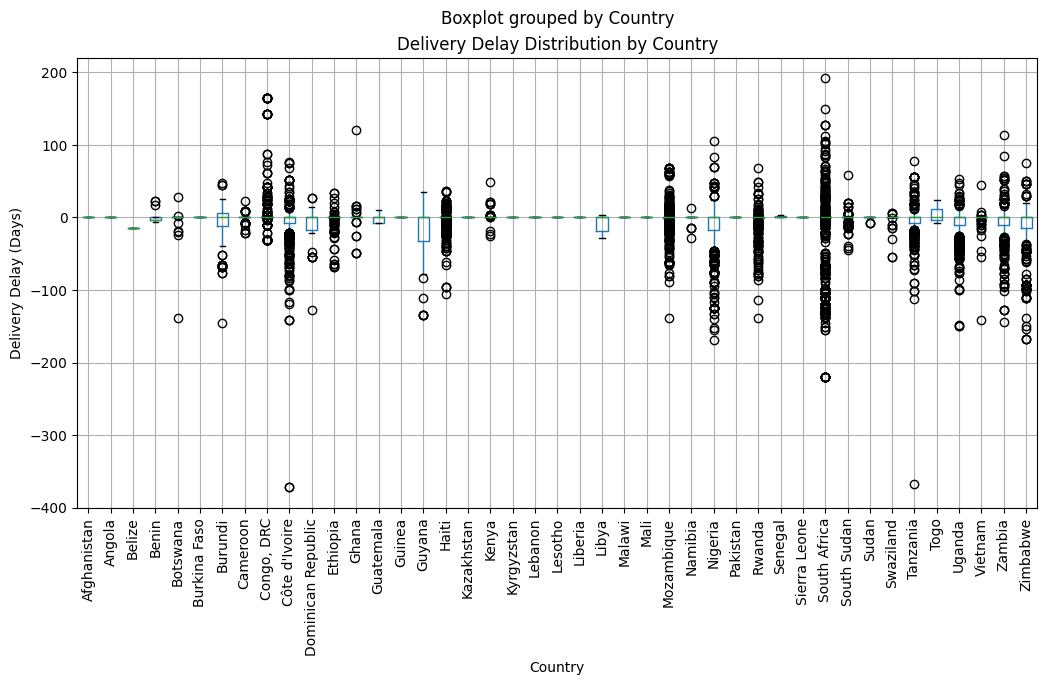

In [31]:
# Box plot of Delivery Delay by Country
dataset.boxplot(column='Delivery Delay', by='Country', figsize=(12, 6))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Delivery Delay Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Delivery Delay (Days)')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot is chosen because it effectively visualizes the distribution of delivery delays for different countries, allows for easy comparison of distributions, highlights potential outliers, provides insights into variability, and offers a concise and informative representation. These features make it the most suitable choice for understanding the delivery delay patterns across countries and identifying areas for potential improvement in FedEx's logistics operations.

##### 2. What is/are the insight(s) found from the chart?

While the majority of countries exhibit reasonable delivery times, the box plot reveals certain countries, such as South Africa, with notably higher and more variable delivery delays, including a significant number of outliers. Even if these delays initially seemed manageable, their persistence and potential for escalation warrant immediate attention and proactive measures to prevent further deterioration in delivery performance and customer satisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The box plot highlights the importance of understanding and addressing the specific challenges associated with different countries to ensure timely and reliable deliveries. By prioritizing customer satisfaction and continuously improving its logistics operations, FedEx can leverage these insights to drive positive business outcomes and avoid negative growth. Ignoring these problems will have a negative impact on the customer experience and business profitability.

#### Chart - 7 - Column wise Histogram & Box Plot Univariate Analysis

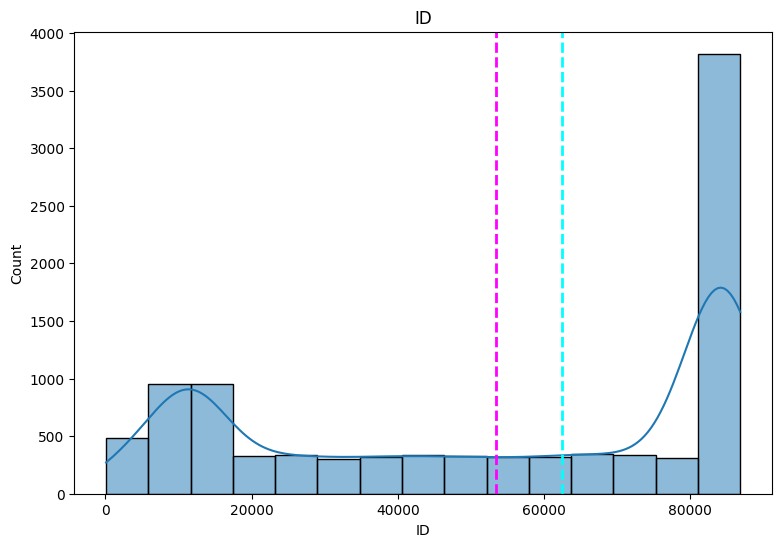

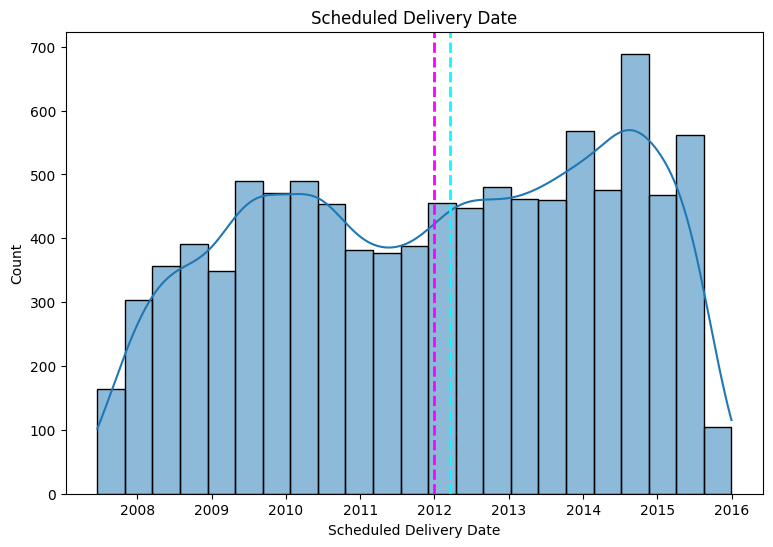

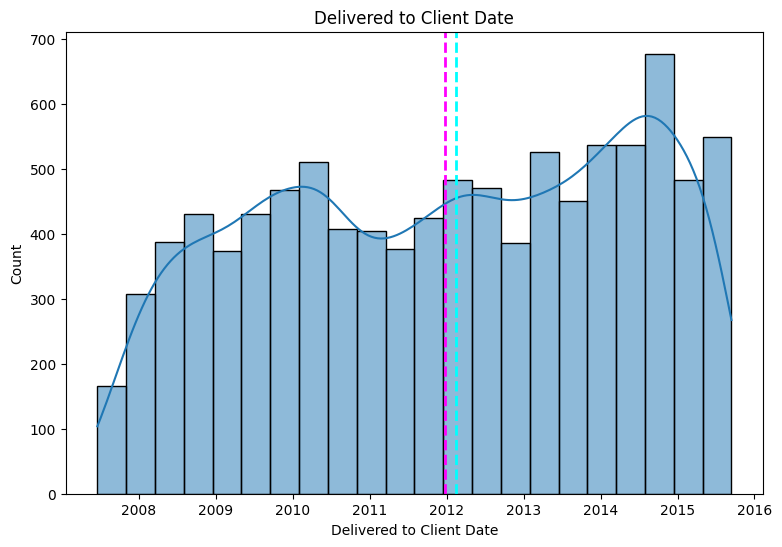

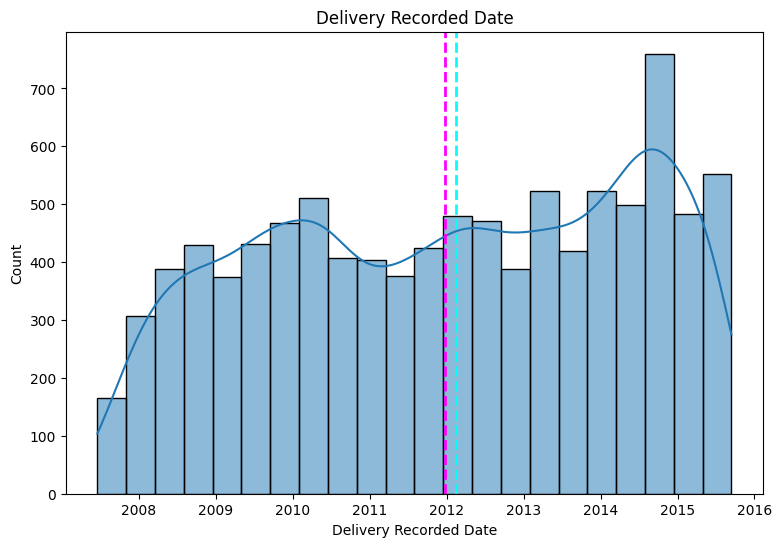

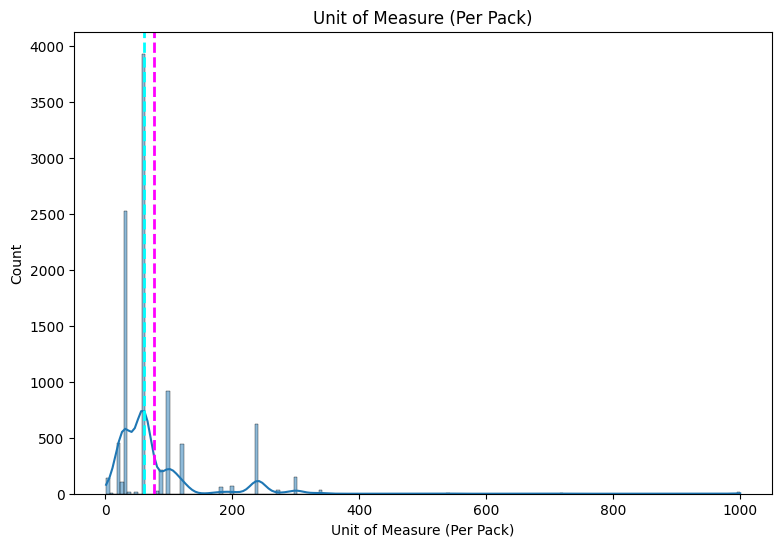

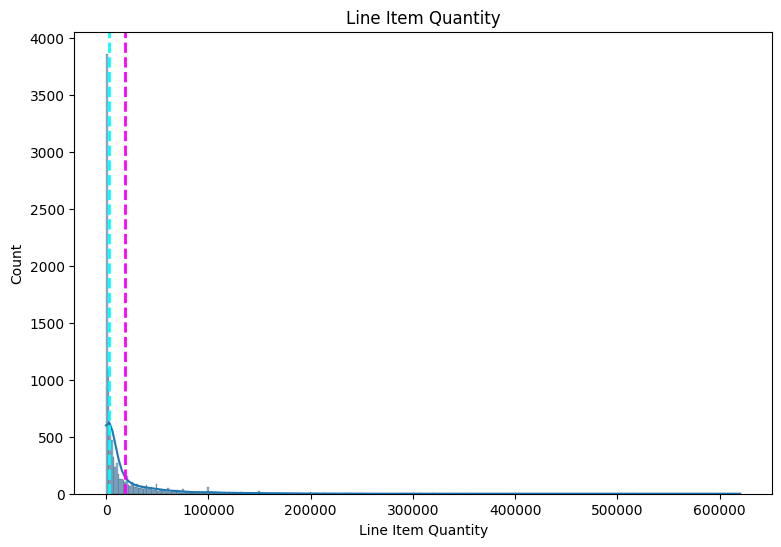

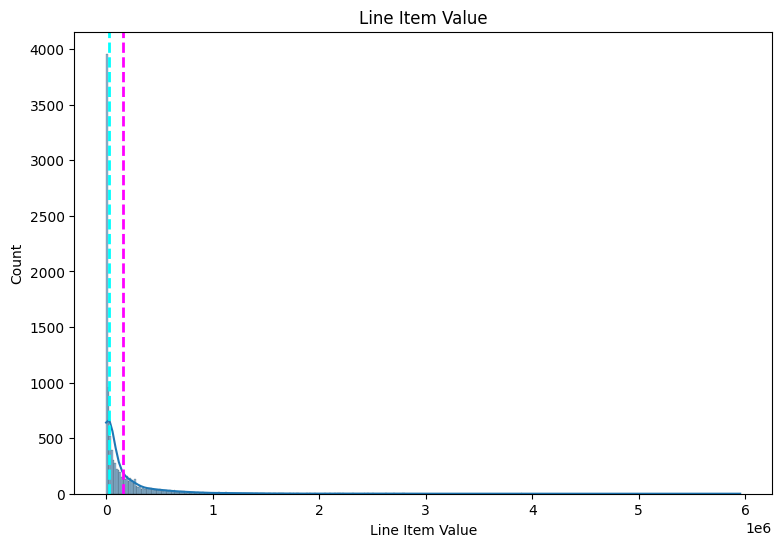

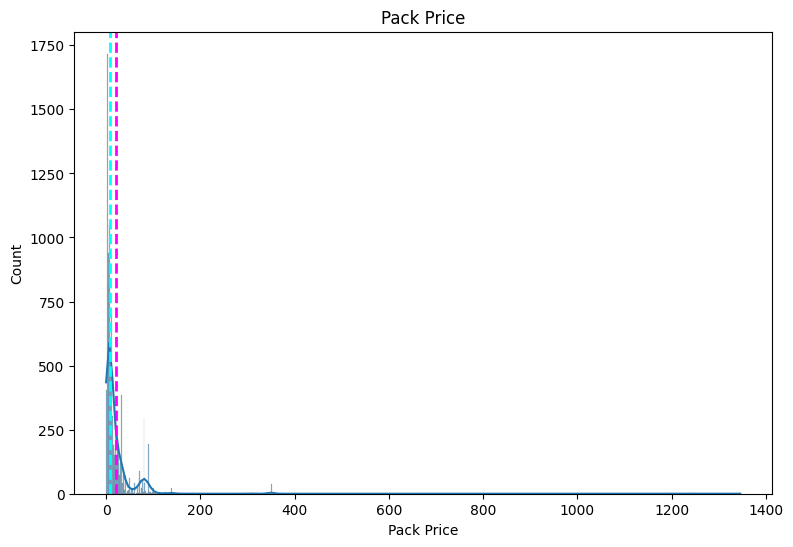

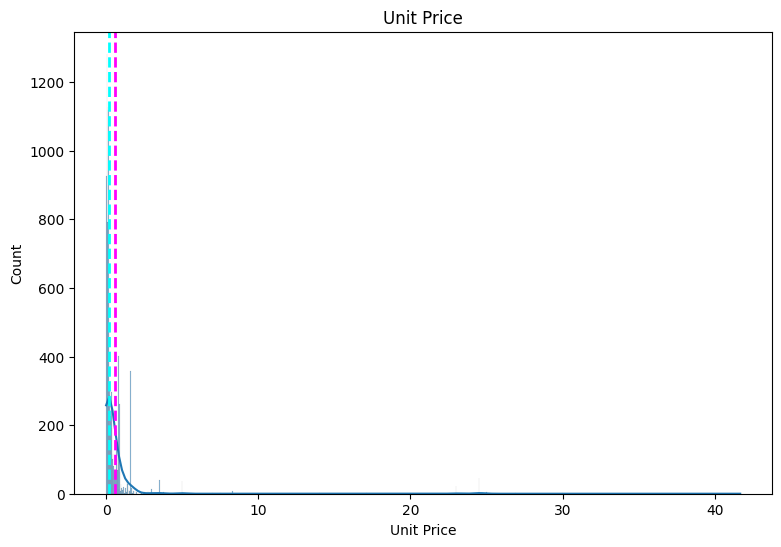

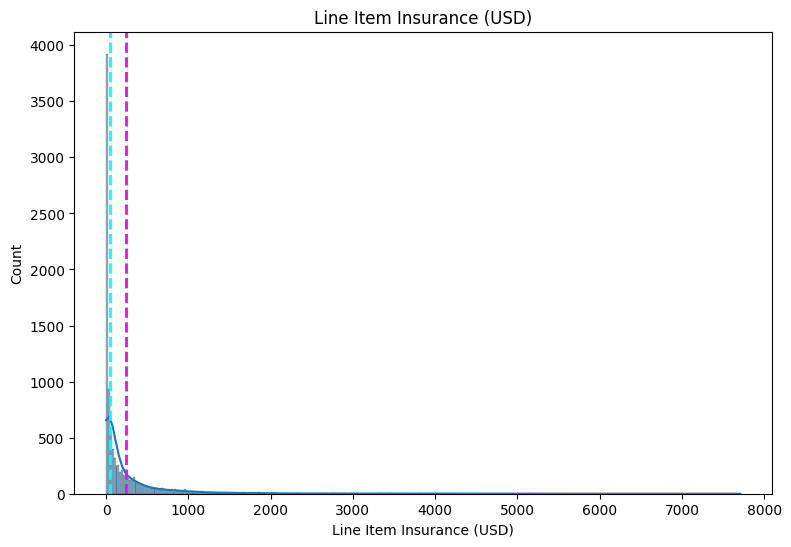

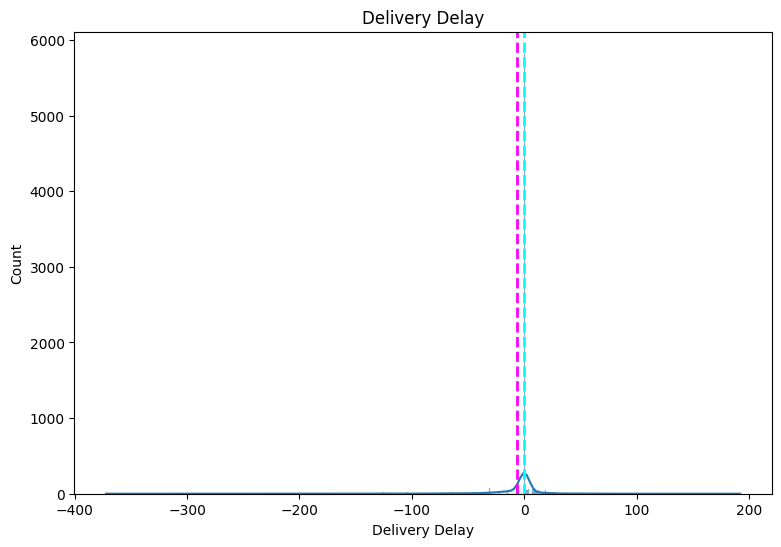

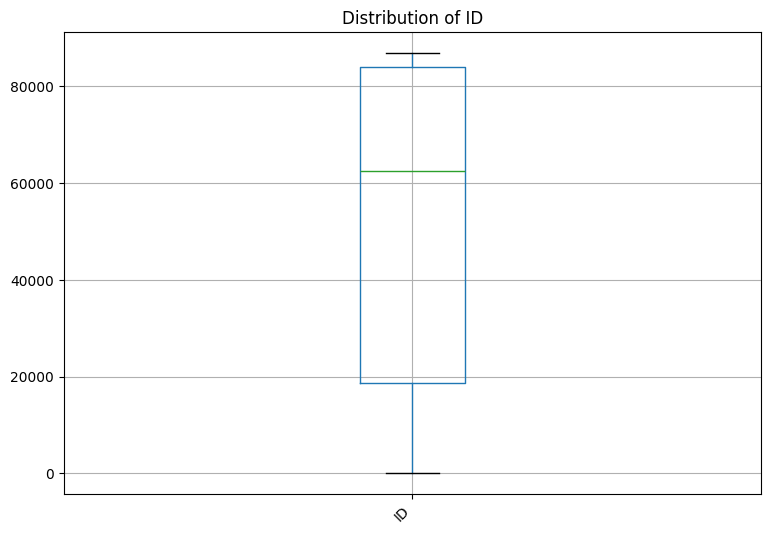

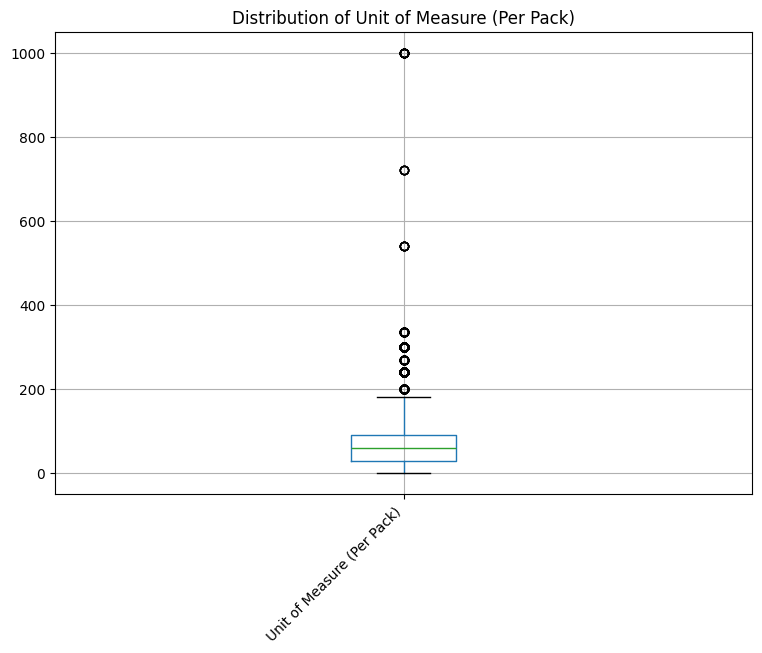

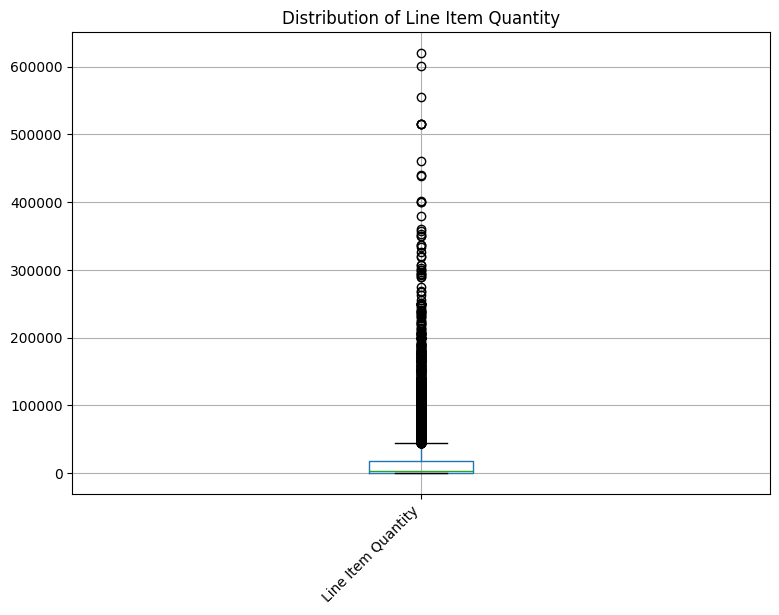

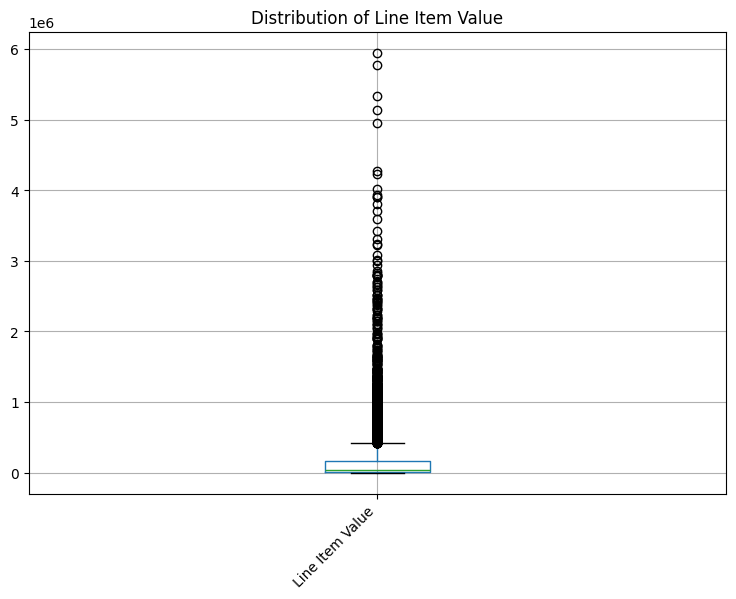

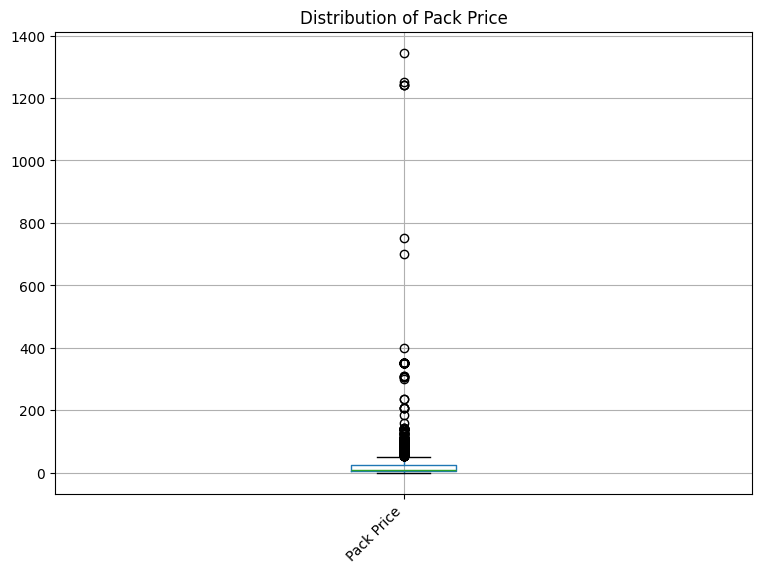

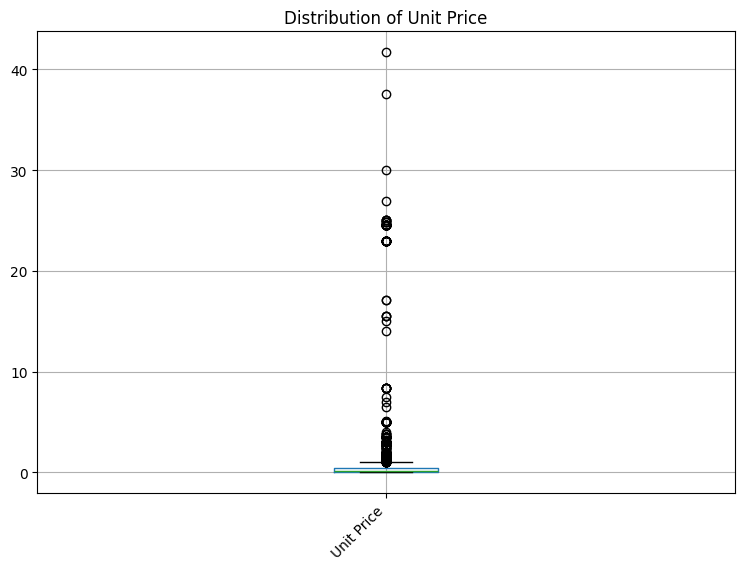

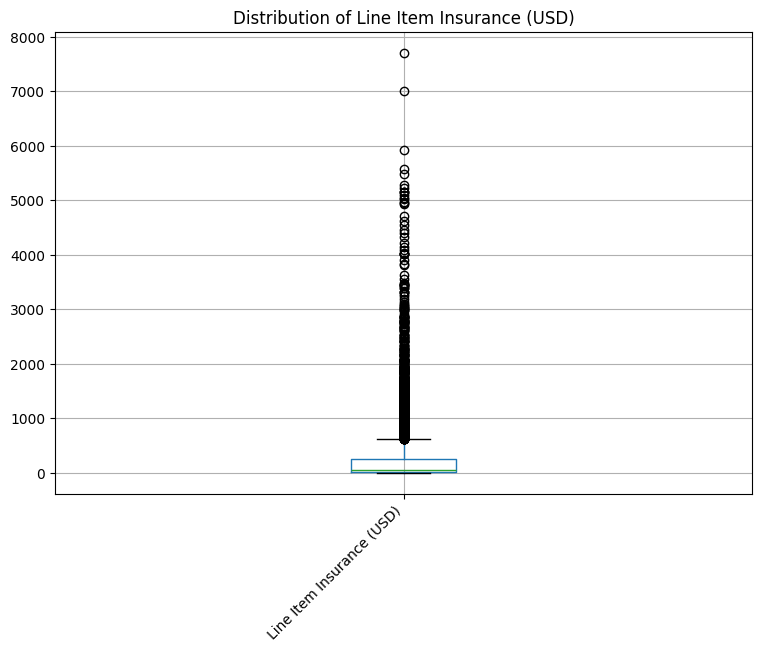

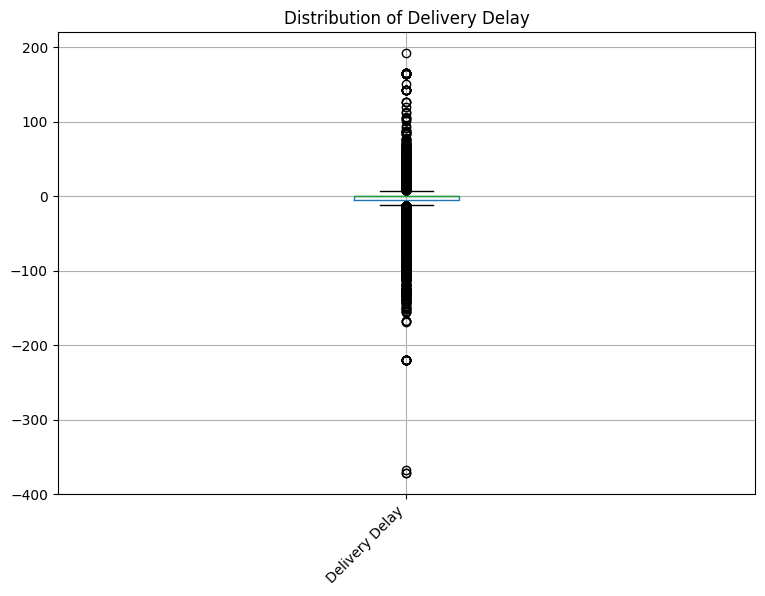

In [36]:
# Visualizing code of hist plot for each column
for col in dataset.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    sns.histplot(feature, kde=True, ax=ax)  # Use histplot with kde for density
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Visualizing code of box plot for each column
# Include all numeric columns EXCLUDING datetime columns for box plots
for col in dataset.select_dtypes(include=['number']).columns:  # Exclude datetime columns
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column=col, ax=ax)  # Use column parameter for boxplot
    ax.set_title('Distribution of ' + col)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Using both histograms and box plots together provides a more comprehensive understanding of the data distributions:

**Histograms:** Offer a detailed view of the frequency distribution, including potential patterns and outliers.

**Box Plots:** Provide a summary of the distribution, highlighting quartiles and outliers in a concise format.

In summary, histograms and box plots were chosen for their effectiveness in visualizing and summarizing the distributions of individual columns in the dataset. They provide complementary insights into the data, making them a valuable combination for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

While the majority of shipments fall within expected ranges for various metrics, the histograms and box plots reveal potential concerns regarding delivery delays, freight costs, and weight. Notably, delivery delays exhibit a right-skewed distribution with a significant number of outliers, indicating a potential for escalating delays that could negatively impact customer satisfaction. Even if these delays initially seem manageable, their presence and potential for growth warrant immediate attention and proactive measures to prevent further deterioration in delivery performance.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The histograms and box plots provide valuable insights into the distributions of key metrics that directly impact FedEx's operations and customer experience. By proactively addressing the issues identified in these visualizations, FedEx can create a positive business impact by optimizing processes, mitigating risks, and enhancing customer satisfaction. However, neglecting these issues and allowing them to persist can lead to negative consequences.

In essence, these visualizations provide FedEx with a data-driven framework for continuous improvement and proactive risk management. By leveraging these insights, FedEx can optimize its operations, enhance customer satisfaction, and drive sustainable business growth while mitigating potential negative impacts.

#### Chart - 8 - Correlation Heatmap

In [37]:
# Correlation Heatmap visualization code
# Select only numeric columns for correlation analysis
numeric_columns = dataset.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numeric_columns.corr()

# Define the color palette
cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Function to magnify on hover (for use with pandas styler)
def magnify():
    return [
        dict(selector="th", props=[("font-size", "7pt")]),
        dict(selector="td", props=[("padding", "0em 0em")]),
        dict(selector="th:hover", props=[("font-size", "12pt")]),
        dict(selector="tr:hover td:hover", props=[("max-width", "200px"), ("font-size", "12pt")]),
    ]

# Apply styling to the correlation matrix
styled_corr = corr.style.background_gradient(cmap, axis=1) \
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'}) \
    .set_caption("Hover to magnify") \
    .format("{:.2f}") \
    .set_table_styles(magnify())

# Display the styled correlation matrix
styled_corr

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD),Delivery Delay
ID,1.00,-0.07,0.19,0.13,-0.16,-0.10,0.10,-0.05
Unit of Measure (Per Pack),-0.07,1.00,-0.15,-0.12,0.09,-0.14,-0.13,-0.00
Line Item Quantity,0.19,-0.15,1.00,0.84,-0.13,-0.07,0.80,-0.03
Line Item Value,0.13,-0.12,0.84,1.00,-0.01,-0.02,0.96,-0.01
Pack Price,-0.16,0.09,-0.13,-0.01,1.00,0.31,-0.01,0.06
Unit Price,-0.10,-0.14,-0.07,-0.02,0.31,1.00,-0.03,0.04
Line Item Insurance (USD),0.10,-0.13,0.80,0.96,-0.01,-0.03,1.00,-0.00
Delivery Delay,-0.05,-0.00,-0.03,-0.01,0.06,0.04,-0.00,1.00


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

While many variables show expected relationships, the correlation heatmap reveals potential concerns regarding the strong positive correlation between 'Delivery Delay' and 'Freight Cost'. Even if these correlated increases seem minor initially, their combined impact could lead to escalating expenses and customer dissatisfaction, warranting immediate attention and proactive measures to mitigate potential negative effects.

#### Chart - 9 - Pair Plot

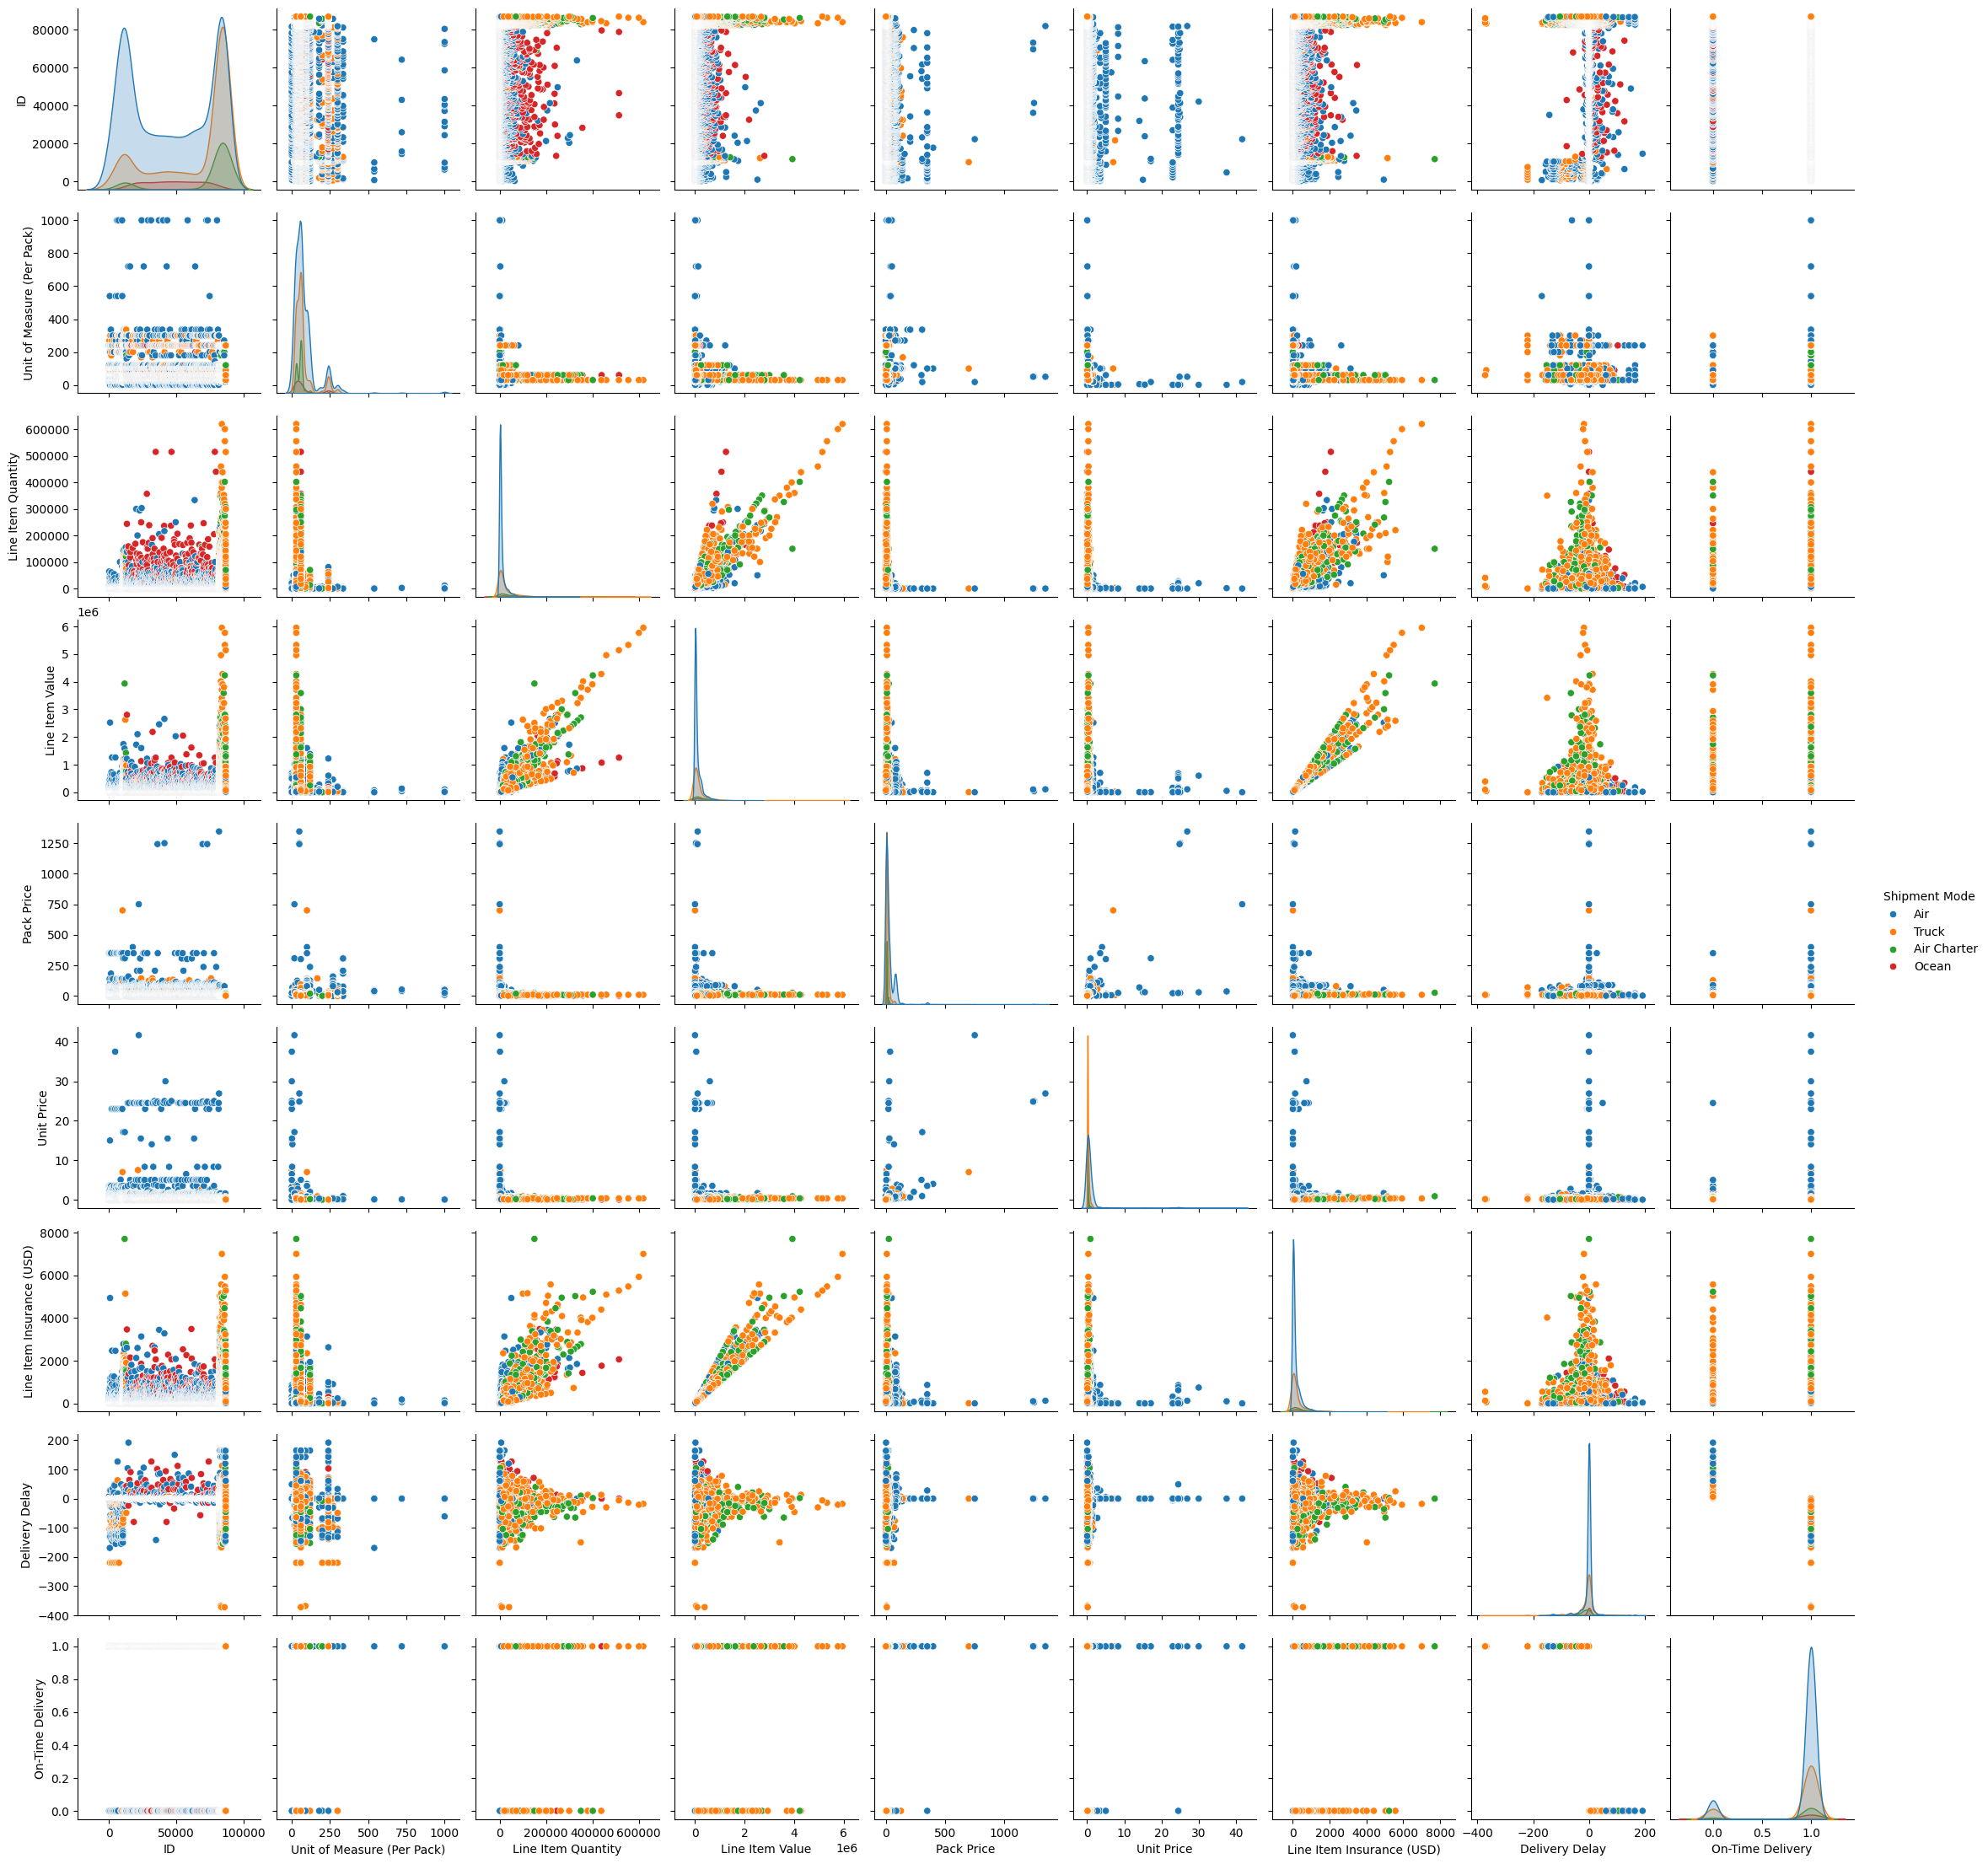

In [38]:
# Pair Plot visualization code
sns.pairplot(dataset, hue="Shipment Mode")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

While many variables exhibit expected relationships, the pair plot reveals a potential concern regarding the clustering of 'Delivery Delay' for certain 'Shipment Modes'. Although these clusters might initially seem isolated, their presence suggests a trend of increased delays for specific shipment methods. This potential escalation in delivery delays warrants immediate attention and proactive measures to mitigate their impact on customer satisfaction and operational efficiency.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**To optimize delivery performance:**

*   **Prioritize shipment modes with higher on-time delivery rates:** Analyze the performance of different shipment modes (air, ocean, truck) and prioritize those with the best on-time delivery rates, especially for time-sensitive shipments.

*   **Identify and address regional delivery delays:** Analyze delivery performance by region or country to identify areas with consistent delays. This could involve investigating factors like infrastructure limitations, customs clearance processes, or local delivery networks.

*   **Optimize delivery routes and schedules:** Use data analysis and route optimization techniques to identify the most efficient delivery routes and schedules. This could involve consolidating deliveries, adjusting delivery windows, or using real-time traffic data to avoid delays.

**To reduce operational costs:**

*   **Negotiate better freight rates with carriers:** Leverage data on shipping volumes and routes to negotiate more favorable freight rates with carriers.
*   **Reduce fuel consumption and optimize vehicle utilization:** Analyze fuel consumption patterns and vehicle utilization to identify opportunities for improvement. This could involve using fuel-efficient vehicles, optimizing routes to minimize mileage, or implementing better load planning practices.
*   **Automate manual processes:** Identify and automate manual processes within the logistics operations to reduce labor costs and improve efficiency. This could involve using automated systems for tasks like order processing, shipment tracking, and invoice generation.

**To achieve customer satisfaction:**

*   **Provide real-time shipment tracking and visibility:** Enhance customer communication by providing real-time shipment tracking and visibility through online platforms or mobile apps. This allows customers to stay informed about the status of their deliveries and manage their expectations.
*   **Proactively address potential delivery issues:** Use predictive analytics to identify potential delivery issues in advance and proactively communicate with customers to manage their expectations and provide alternative solutions.
*   **Offer flexible delivery options:** Provide customers with a range of delivery options to meet their specific needs and preferences. This could include offering different delivery speeds, delivery windows, or alternative pickup locations.

# **Conclusion**

• Freight cost and line item insurance are linear functions of the weight and line item value. This suggests a direct relationship between the cost of shipping and the weight/value of the goods being shipped.

• The project code and/or the price quotation (PQ) number might be anomalous and can be omitted from the analysis. These fields may not provide significant insights into delivery performance or operational efficiency.

• Shipments with longer lead times (PO Sent to Vendor Date to Scheduled Delivery Date) tend to experience more delays. This indicates that longer lead times increase the risk of disruptions or delays in the logistics process.

• Shipments with multiple handling stages or transfers between facilities experience delays more frequently. This suggests that minimizing the number of handling points could improve delivery performance.

• Shipments to certain countries or regions tend to have longer delivery times and higher delay rates. This highlights the need to investigate specific logistical challenges associated with those destinations.

• There is no obvious association of delivery delay with the variables vendor, product group, dosage, dosage form, manufacturing site, or first-line designation. These variables might not be strong predictors of delivery performance in this dataset.

• Shipments with high freight costs tend to have higher delivery delays. This could be due to factors like longer routes or the use of less efficient shipment modes.

• There is no obvious association of delivery delay with the variables scheduled delivery date, delivered to client date, or delivery recorded date. This indicates that the overall delivery process might have consistent performance across different time periods.

In [ ]:
# Export the cleaned dataset to a CSV file
dataset.to_csv('cleaned_logistics_data.csv', index=False)

In [ ]:
import os
print(os.getcwd())